<a href="https://colab.research.google.com/github/jchamilton75/UniversiteOuverte/blob/main/Combinaison_de_sondes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 4 - Combinaison des sondes cosmologiques
Pour des raisons de simplicité nous n'allons combiner ici que les analyses CMB et SNIa. Nous n'incluons pas les BAO qui demanderaient un travail supplémentaire spécifique.

In [1]:
import sys
print("Using Python {}".format(sys.version_info[0]))

!pip install healpy
import healpy as hp

### Install pypico from Github
!pip install git+https://github.com/marius311/pypico
import pypico

!pip install emcee
!pip install iminuit
!rm -rf cosmolib.py*
!wget --no-check-certificate https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/cosmolib.py
import cosmolib as cs

#### Reading file from Google Drive
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from pylab import *
import numpy as np
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(10,5))
rc('font',size=12)
rc('text',usetex=False)
rcParams['image.cmap'] = 'jet'


Using Python 3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 20.5 MB/s eta 0:00:00
  Cloning https://github.com/marius311/pypico to /tmp/pip-req-build-qoaj2_bi
  Running command git clone --filter=blob:none --quiet https://github.com/marius311/pypico /tmp/pip-req-build-qoaj2_bi
  Resolved https://github.com/marius311/pypico to commit a06ced4228d451ebd869d3eb4ea8ed69ee25a1e5
  Preparing metadata (setup.py) ... done
  Created wheel for pypico: filename=pypico-4.0.0-cp310-cp310-linux_x86_64.whl size=276831 sha256=98467c33cb4fdfb107c7934d9dd83c1883634f4cd38ab3d15cbddba5f2bbf730
  Stored in directory: /tmp/pip-ephem-wheel-cache-0nbxounv/wheels/79/64/e5/dd637aa7bc460478c1539dc9c3d0747f522ece5b0428e44e1c
Successfully built pypico
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.9/424.9 kB 6.6 MB/s eta 0:00:00
--2024-03-13 15:43:32--  https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/ma

## SNIa
Nous avons déjà largement exploré les SNIa. Le code suivant permet de contraindre les paramètres cosmologiques $\Omega_m$, $\Omega_\Lambda$ avec une méthode MCMC.

In [ ]:
!rm -f union2.1.txt
!wget --no-check-certificate https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/Data/union2.1.txt
! ls -lrt
filename='union2.1.txt'
zsn,musn,dmusn=np.loadtxt(filename,usecols=(1,2,3),unpack=True)

def newmusn(x, pars):
    cosmo = {'h':pars[0], 'omega_M_0':pars[1],
             'omega_lambda_0':pars[2], 'w0':pars[3]}
    val = cs.musn1a(x, cosmo)
    val[isnan(val)] = -1e30
    return val

data_SNIa = cs.Data(zsn, musn, dmusn, newmusn)
guess = np.array([0.7, 0.3, 0.7, -1])
chainomol_SNIa = data_SNIa.run_mcmc(guess, nbmc=3000, allvariables=['h','om', 'ol','w'],
                        fixpars=[3])

sm = 3
cs.matrixplot(chainomol_SNIa, ['h', 'om', 'ol'], 'blue', sm,
              limits = [[0,1], [0,1], [0,1.]],
              labels=['h', '$\Omega_m$','$\Omega_\Lambda$'])
subplot(3,3,8)
plot(linspace(0,1,10),1-linspace(0,1,10),'k--')

--2024-03-13 15:45:56--  https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/Data/union2.1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33899 (33K) [text/plain]
Saving to: ‘union2.1.txt’

union2.1.txt        100%[===================>]  33.10K  --.-KB/s    in 0.002s  

2024-03-13 15:45:56 (13.7 MB/s) - ‘union2.1.txt’ saved [33899/33899]

total 64
drwxr-xr-x 1 root root  4096 Mar 11 13:25 sample_data
-rw-r--r-- 1 root root 16741 Mar 13 15:43 cosmolib.py
drwxr-xr-x 2 root root  4096 Mar 13 15:43 __pycache__
-rw-r--r-- 1 root root 33899 Mar 13 15:45 union2.1.txt
fixpars [3]
self.fixedpars [3]


/content/cosmolib.py:74: RuntimeWarning: invalid value encountered in log10
  return(5*np.log10(dlum)-5+5*np.log10(cosmo['h']/0.7))
/content/cosmolib.py:28: RuntimeWarning: invalid value encountered in sqrt
  e_z=np.sqrt(omegak*(1+z)**2+omegaxz+omegam*(1+z)**3)


parm [ 0.57909841  0.2785315   0.72336426 -1.        ]
errm [3.29967057e-32 6.28690330e-02 8.20002496e-02 1.00000000e-02]
Ndim init: 4
New ndim: 3
Len(pos): (32, 4)
len(fixepars): 1
New len(pos): (32, 3)
Burning


100%|██████████| 1000/1000 [00:33<00:00, 29.82it/s]


Sampling


  1%|          | 28/3000 [00:01<01:35, 31.08it/s]

## CMB

On a d'abord besoin de PICO:

In [3]:
!pip install git+https://github.com/marius311/pypico
import pypico

download = drive.CreateFile({'id': '17DWeh3xPec2iOXrQxNN2aKNr0uxuoahb'})
download.GetContentFile('jcset_py3.dat')
!ls -lrt

pico = pypico.load_pico("jcset_py3.dat")

  Cloning https://github.com/marius311/pypico to /tmp/pip-req-build-zq4v6kbu
  Running command git clone --filter=blob:none --quiet https://github.com/marius311/pypico /tmp/pip-req-build-zq4v6kbu
  Resolved https://github.com/marius311/pypico to commit a06ced4228d451ebd869d3eb4ea8ed69ee25a1e5
  Preparing metadata (setup.py) ... done
total 96872
drwxr-xr-x 1 root root     4096 Mar 11 13:25 sample_data
-rw-r--r-- 1 root root     4950 Mar 12 18:01 cl_forWP3.txt
-rw-r--r-- 1 root root    16741 Mar 12 18:03 cosmolib.py
drwxr-xr-x 2 root root     4096 Mar 12 18:03 __pycache__
-rw-r--r-- 1 root root    33899 Mar 12 18:03 union2.1.txt
-rw-r--r-- 1 root root 99120769 Mar 12 18:06 jcset_py3.dat


Il nous faut une fonction qui appelle PICO avec notre format de param`´tres cosmologiques:

In [4]:
def specTcmb(x, cosmo):
  if np.max(np.abs([cosmo[0], cosmo[1], cosmo[2]])) > 10:
    print(cosmo)
    return(x*0-1e10)
  parpico = pico.example_inputs().copy()
  # Fixed parameters (from Planck)
  parpico['ombh2'] = 0.02225#/1.07
  parpico['As'] = np.exp(3.094)/1e10
  parpico['ns'] = 0.9645
  parpico['tau'] = 0.079

  # Parameters we fit here
  parpico['H0'] = cosmo[0]*100
  om = cosmo[1]
  omh2 = om * cosmo[0]**2
  parpico['omch2'] = omh2 - parpico['ombh2']
  parpico['omk'] = 1 - om - cosmo[2]

  dl = pico.get(force=True, **parpico)['dl_TT']
  ell = np.arange(len(dl-2))+2
  return np.interp(x, ell, dl)

Ensuite on a besoin des données de Planck

(0.0, 710.0)

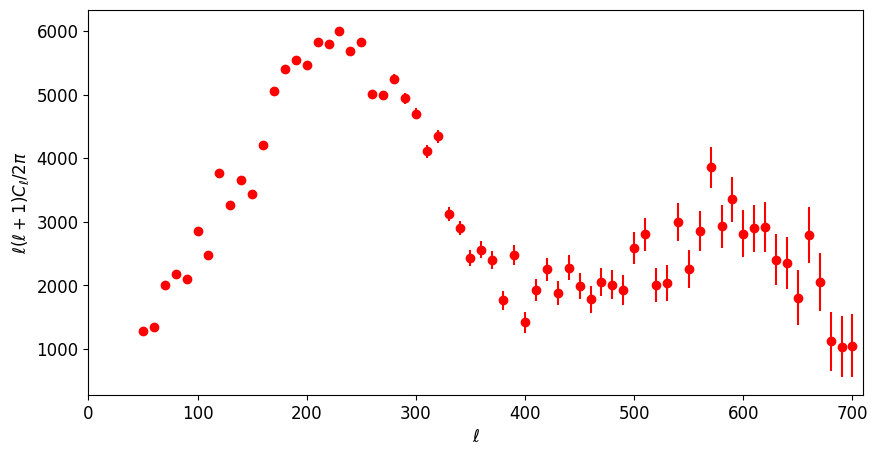

In [5]:
!rm -rf cl_forWP3.txt
download = drive.CreateFile({'id': '1-3QIucDVTUjPhc2hCY5aXqsa-b0jGQNI'})
download.GetContentFile('cl_forWP3.txt')

ellvalues, dlexp, dlnoise = np.loadtxt('cl_forWP3.txt').T
fsky = 0.1
deltal = 10

xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')
errorbar(ellvalues, dlexp, yerr=dlnoise, fmt='ro')

xlim(0,np.max(ellvalues)+10)

On constate que les barres d'erreur de Planck n'incluent pas la varaince cosmique... Il faut donc la calculer et l'ajouter.

$$\Delta C_\ell = \sqrt{\frac{2}{(2\ell+1)f_{sky}\Delta_\ell}}C_\ell$$

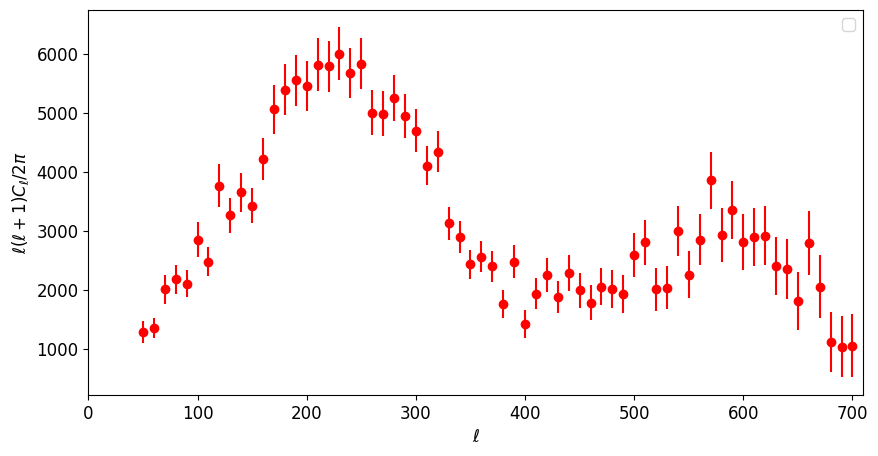

In [6]:
samplevariance = np.sqrt(2./((2*ellvalues+1)))*dlexp
errdl = samplevariance + dlnoise

xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')
errorbar(ellvalues, dlexp, yerr=errdl, fmt='ro')
xlim(0,np.max(ellvalues)+10)
legend()

On fait un premier fit avec Minuit pour avoir un bon point de départ.

Fitting with Minuit
Chi2 = 79.32297847005236
ndf = 63
Fitted values:
[0.47353913 0.63959074 0.39048408]
Errors:
[0.16772809 0.45330255 0.36123653]
Covariance:
[[ 0.02813271 -0.07598948  0.06047169]
 [-0.07598948  0.20548321 -0.16364977]
 [ 0.06047169 -0.16364977  0.13049183]]
(<FMin algorithm='Migrad' edm=0.00022344872548932422 edm_goal=0.0002 errordef=1.0 fval=79.32297847005236 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=407 ngrad=0 reduced_chi2=1.2590948963500375 time=-0.8117252689999077>
(Param(number=0, name='x0', value=0.4735391315034701, error=0.16772809267100686, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='x1', value=0.6395907393145357, error=0.4533025543513356, merror=None, is_const=False, is_fixed=False, lower_limit=None, upp

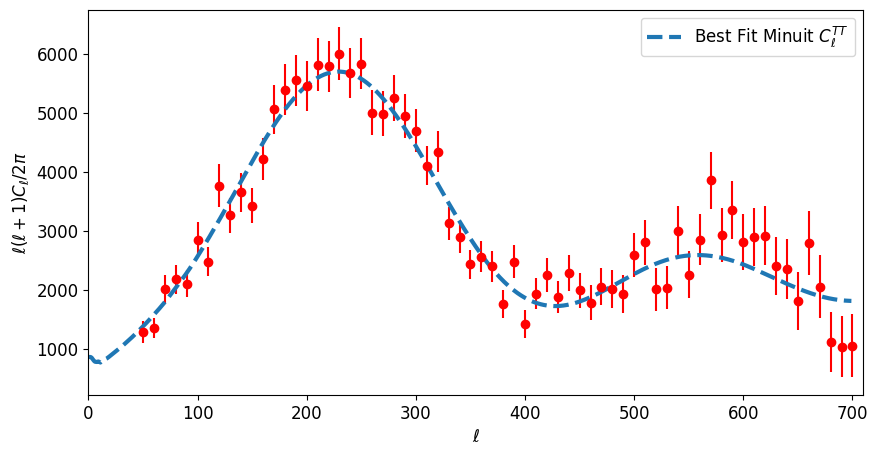

In [7]:
guess = [0.7,0.3, 0.7]
resfit = cs.do_minuit(ellvalues, dlexp, errdl,guess,functname=specTcmb)
print(resfit)

ell = np.arange(np.max(ellvalues))
xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')
errorbar(ellvalues, dlexp, yerr=errdl, fmt='ro')
plot(ell,specTcmb(ell, resfit[1]),'--',lw=3, label='Best Fit Minuit $C_\ell^{TT}$')
plot()
xlim(0,np.max(ellvalues)+10)
legend()

On fait maintenant un fit par MCMC:

In [8]:
data_CMB = cs.Data(ellvalues, dlexp, errdl, specTcmb)
# guess = np.append(resfit[1], -1)
guess = np.array([0.7, 0.3, 0.7, -1.])
print(guess)
chaincmb = data_CMB.run_mcmc(guess, nbmc=3000, allvariables=['h','om', 'ol', 'w'], nsigmas=1, fixpars=[3])

[ 0.7  0.3  0.7 -1. ]
fixpars [3]
self.fixedpars [3]
parm [ 0.47353913  0.63959074  0.39048408 -1.        ]
errm [0.16772809 0.45330255 0.36123653 0.01      ]
Ndim init: 4
New ndim: 3
Len(pos): (32, 4)
len(fixepars): 1
New len(pos): (32, 3)
Burning


100%|██████████| 1000/1000 [00:48<00:00, 20.49it/s]


Sampling


100%|██████████| 3000/3000 [01:44<00:00, 28.63it/s]


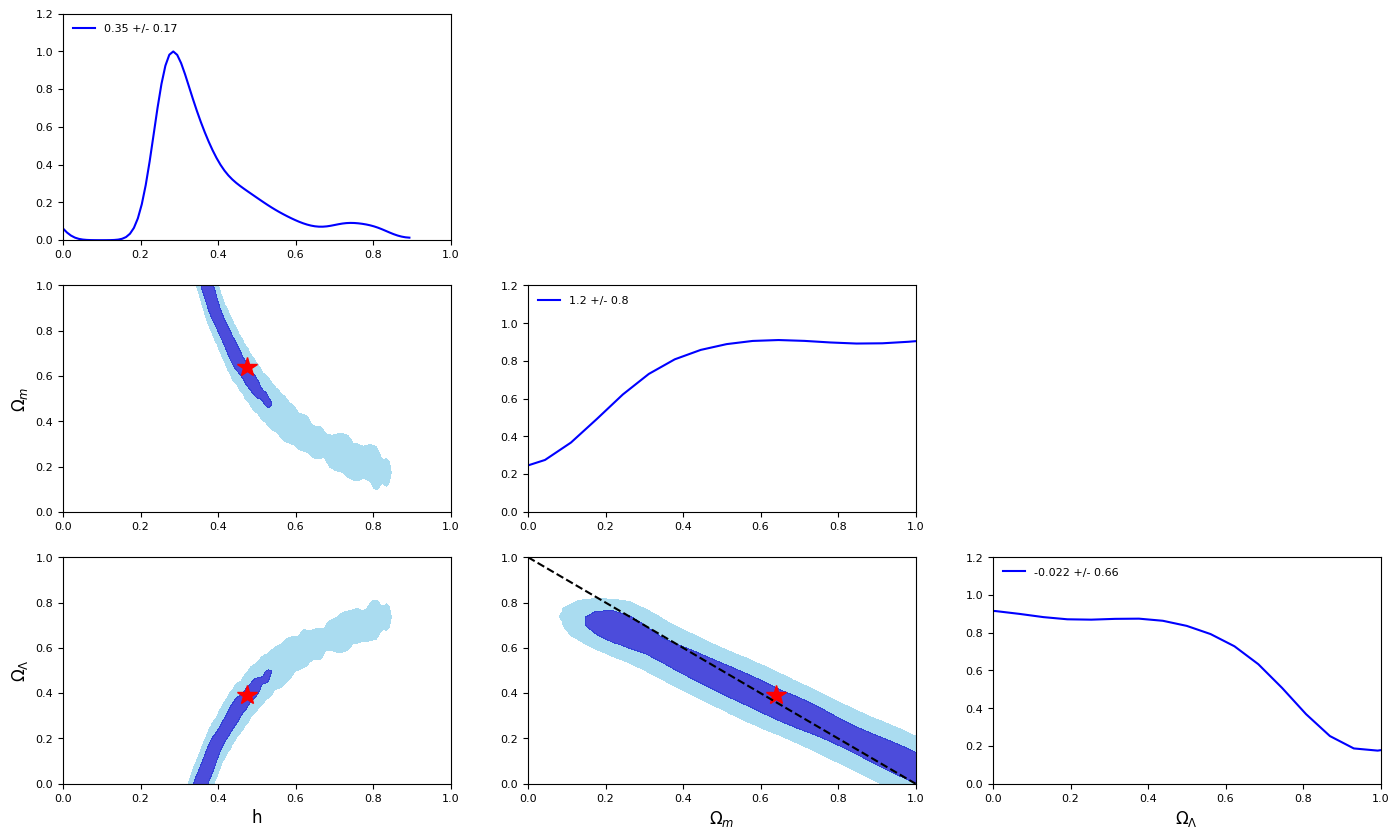

In [9]:
rc('figure',figsize=(17,10))
sm=1
cs.matrixplot(chaincmb, ['h', 'om', 'ol'], 'blue', sm,
              limits = [[0.,1], [0.,1], [0., 1]],
              labels=['h','$\Omega_m$','$\Omega_\Lambda$'])

subplot(3,3,4)
plot(resfit[1][0], resfit[1][1], 'r*', ms=15)
#plot(0.5155, 0.5, 'g*', ms=15)

subplot(3,3,7)
plot(resfit[1][0], resfit[1][2], 'r*', ms=15)
#plot(0.5155, 0.5, 'g*', ms=15)

subplot(3,3,8)
plot(resfit[1][1], resfit[1][2], 'r*', ms=15)
#plot(0.5, 0.5, 'g*', ms=15)
subplot(3,3,8)
plot(linspace(0,1,10),1-linspace(0,1,10),'k--')

## Combinaison SNIa et CMB

Commençons par superposer sur un même graphes les résultats déjà obtenus.

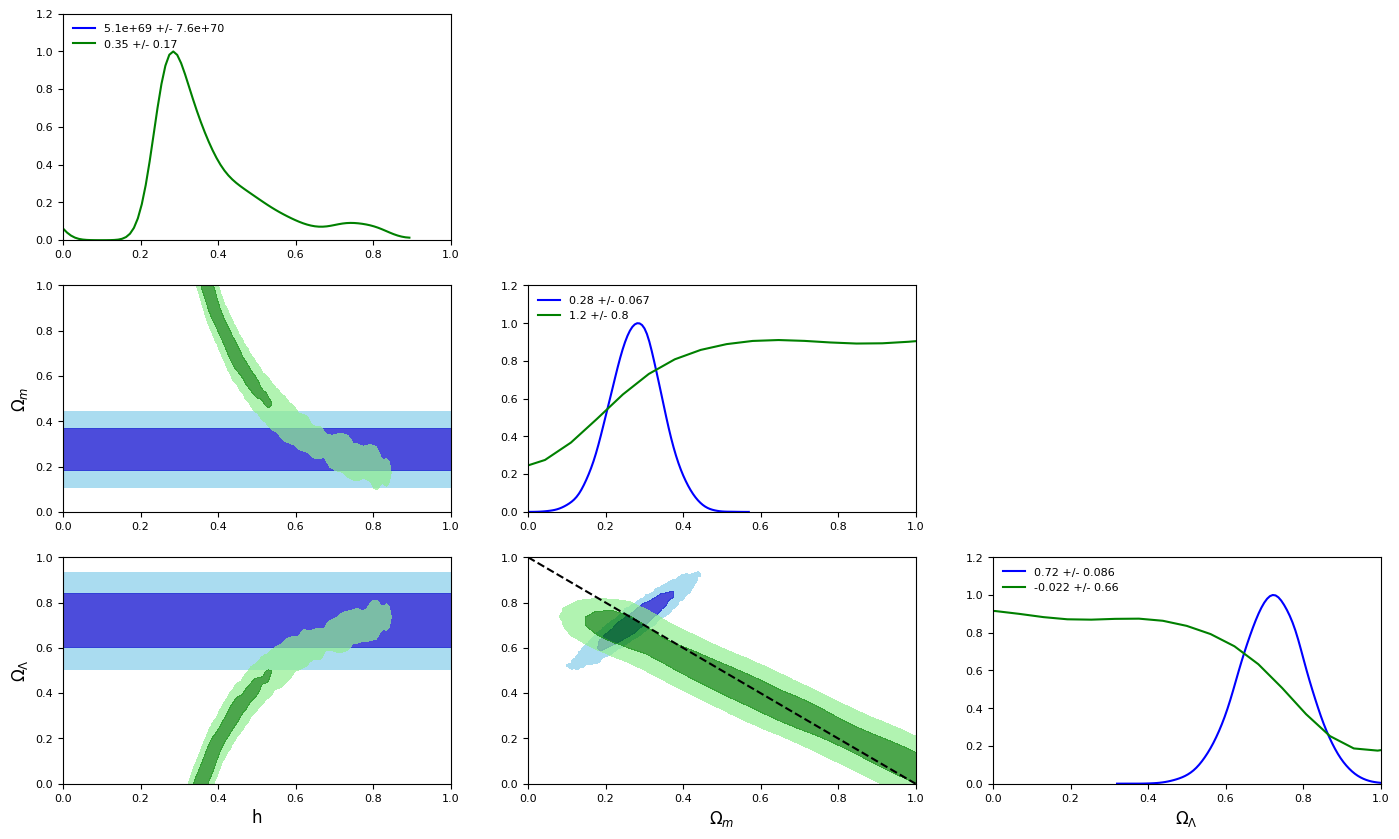

In [10]:
sm = 1
cs.matrixplot(chainomol_SNIa, ['h', 'om', 'ol'], 'blue', sm,
              limits = [[0,1], [0,1], [0,1.]],
              labels=['h', '$\Omega_m$','$\Omega_\Lambda$'])
subplot(3,3,8)
plot(linspace(0,1,10),1-linspace(0,1,10),'k--')

cs.matrixplot(chaincmb, ['h', 'om', 'ol'], 'green', sm,
              limits = [[0.,1], [0.,1], [0., 1]],
              labels=['h','$\Omega_m$','$\Omega_\Lambda$'])


La librairies `cosmolob.py` inclut une classe `Datas` (au pluriel) qui permet de combiner ensemble des instances de la classe `Data`, c'est à dire de combiner ensemble des jeux de données qui contraignent les mêmes paramètres. On instancie simplement la classe `Datas` avec une liste d'instances de la classe `Data` et on peut directement appeler la fonction membre `run_mcmc()` qui va prendre comme comme postérieure le produit des postérieures de chacune des sondes données en entrée. On obtient ainsi des contraintes conjointes.

In [11]:
datas = cs.Datas([data_CMB, data_SNIa])
guess = np.array([0.7, 0.3, 0.7, -1])
chainboth = datas.run_mcmc(guess, nbmc=1500, allvariables=['h','om', 'ol', 'w'], nsigmas=1, fixpars=[3])

fixpars [3]
self.fixedpars [3]
parm [ 0.57909841  0.2785315   0.72336426 -1.        ]
errm [3.29967057e-32 6.28690330e-02 8.20002496e-02 1.00000000e-02]
Ndim init: 4
New ndim: 3
Len(pos): (32, 4)
len(fixepars): 1
New len(pos): (32, 3)
Burning


100%|██████████| 500/500 [00:30<00:00, 16.21it/s]


Sampling


100%|██████████| 1500/1500 [01:32<00:00, 16.18it/s]


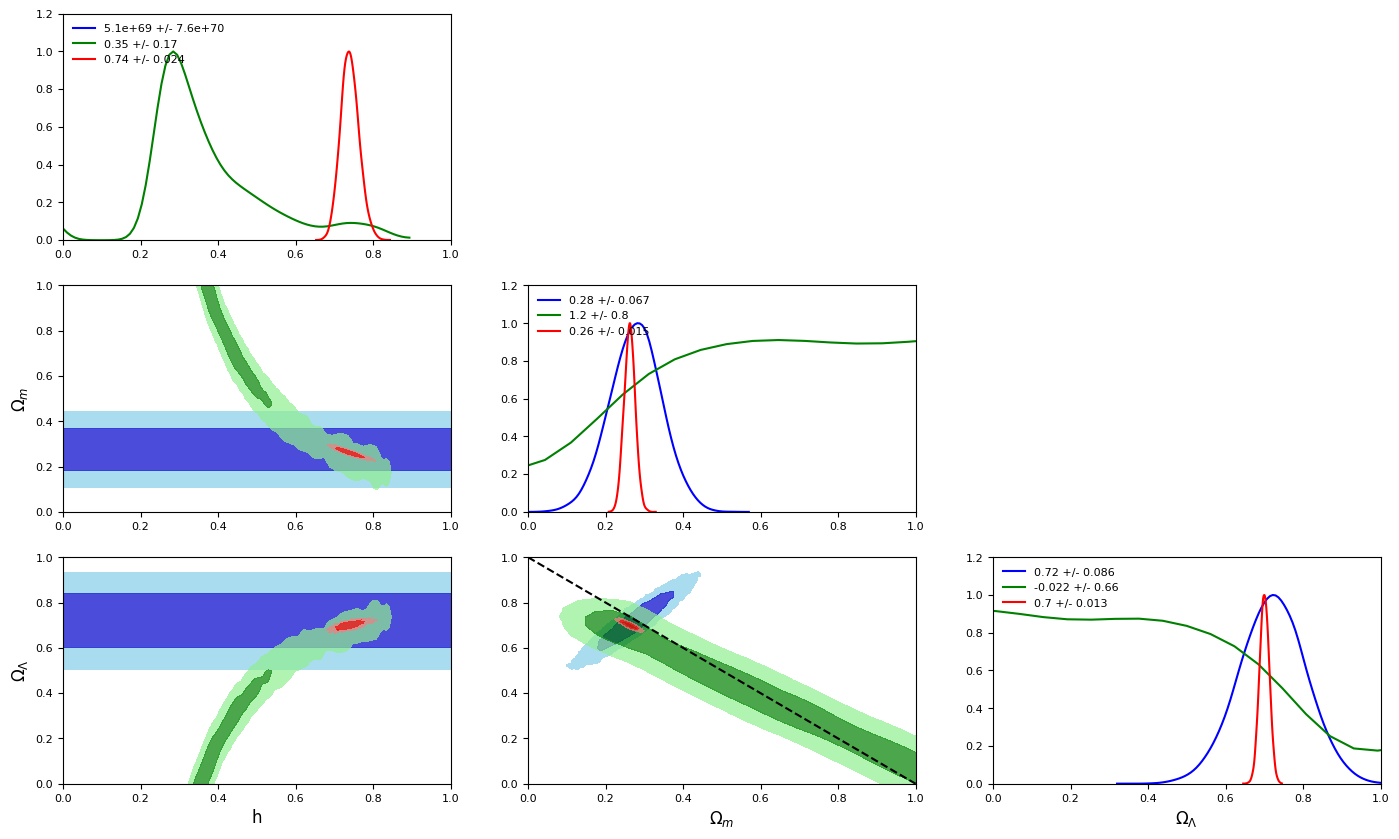

In [12]:
sm = 1
cs.matrixplot(chainomol_SNIa, ['h', 'om', 'ol'], 'blue', sm,
              limits = [[0,1], [0,1], [0,1.]],
              labels=['h', '$\Omega_m$','$\Omega_\Lambda$'])

cs.matrixplot(chaincmb, ['h', 'om', 'ol'], 'green', sm,
              limits = [[0.,1], [0.,1], [0., 1]],
              labels=['h','$\Omega_m$','$\Omega_\Lambda$'])

cs.matrixplot(chainboth, ['h', 'om', 'ol'], 'red', sm,
              limits = [[0.,1], [0.,1], [0., 1]],
              labels=['h','$\Omega_m$','$\Omega_\Lambda$'])

subplot(3,3,8)
plot(linspace(0,1,10),1-linspace(0,1,10),'k--')


Le résultat est légèrement biaisé vis à vis d'un Univers plat, mais c'est dû à un traitement très simplifié du CMB.